# 4. MNIST 데이터로드

In [4]:
import torch

In [21]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
%matplotlib inline
from torch.utils.data import DataLoader
from torch.autograd import Variable
#from torch.utils.data import Variable
import matplotlib.pyplot as plt

###  1. MNIST 로드

In [7]:
mnist_train=dset.MNIST("", train=True, transform=transforms.ToTensor(), #train 용으로 쓰겠다
                      target_transform=None, download=True)

6.0%

100.1%

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


16.4%%

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


180.4%

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw
Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


### 2. 그려보기

torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 0
60000
mnist_train 길이:  60000
5
<built-in method size of Tensor object at 0x7f7bfa2cbe60>


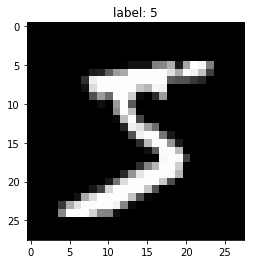

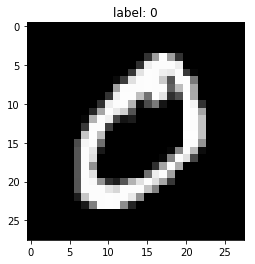

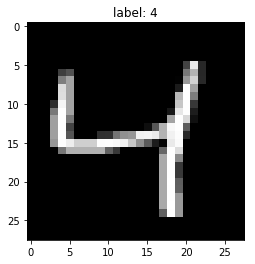

In [13]:
# MNIST data 하나 형태 출력
image, label=mnist_train.__getitem__(0)
print image.size(), label

image, label=mnist_train[1] #리턴값 2개가 가능하다, 0번째 데이터의 이미지 사이즈와 레이블이 몇번인지?
print image.size(), label

print mnist_train.__len__() ##전체 데이터 개수의 길이, 60000장, 아래줄이랑 같은 문법임
print "mnist_train 길이: ", len(mnist_train)

#그리기
print mnist_train[0][1] #label
print mnist_train[0][0].size #image ##[0][0]에는 이미지, [0][1]에는 label이

for i in range(3):
    img=mnist_train[i][0].numpy() #image 타입을 numpy로 변환(1, 28,28)
    #print("label:" %d", mnist_train[i][1])
    plt.title("label: %d" %mnist_train[i][1])
    plt.imshow(img[0],cmap='gray')
    plt.show()

### 1) MNIST train, test dataset 가져오기

In [16]:
# "": 현재 폴더에 MNIST 있음
mnist_train=dset.MNIST("",train=True,transform=transforms.ToTensor(), #train용으로 쓰겠다
                      target_transform=None, download=True)
mnist_test=dset.MNIST("",train=False,transform=transforms.ToTensor(), #test용으로 쓰겠다
                      target_transform=None, download=True)

### 2) 대략적인 데이터 형태

mnist_train 길이: 60000
minst_test 길이: 10000
image data 형태:  torch.Size([1, 28, 28])
label:  5


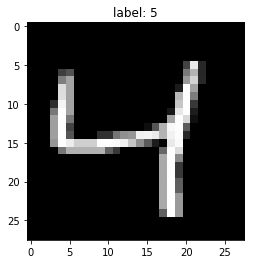

In [17]:
print "mnist_train 길이:", len(mnist_train)
print "minst_test 길이:", len(mnist_test)

#데이터 하나 형태
image,label=mnist_train.__getitem__(0) #0번째 데이터
print "image data 형태: ",image.size()
print "label: ", label  #0부터 9까지

#그리기
Img=image.numpy() #image 타입을 numpy로 변환(1, 28,28)
plt.title("label: %d" %label)
plt.imshow(img[0],cmap='gray')
plt.show()

### 3) 데이터 로드함수

In [19]:
#학습 시킬 때 batch_size로 끊어서 로드하기 위함
batch_size=16
train_loader=torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100],batch_size=batch_size,
                                        #mnist_train을 트레인 시키자
                                        shuffle=True, num_workers=2,
                                        drop_last=True) #batch_size만큼 나눌 때 나머지는 버려라
test_loader=torch.utils.data.DataLoader((mnist_test),batch_size=batch_size,
                                        shuffle=False, num_workers=2,
                                        drop_last=True)

##mini batch단위로 끊어서 학습을 시킨다. ->DataLoader 함수 사용
##batch_size:얼마나 단위로 끊을건가?(우리는 16)
##데이터 뭉침을 위해 shuffle 사용(data loader에 있음), 보통 train은 true, test는 false로 해준다.

### 4) 데이터 로드함수 이해하기

[0]
한 번에 로드되는 데이터 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


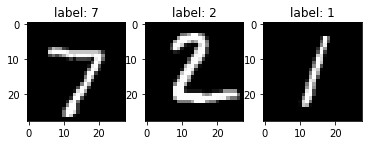

[1]
한 번에 로드되는 데이터 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


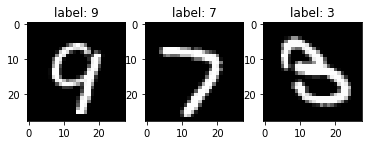

[2]
한 번에 로드되는 데이터 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


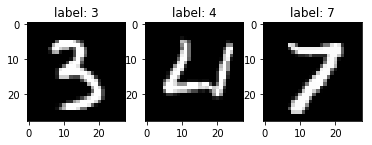

[3]
한 번에 로드되는 데이터 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


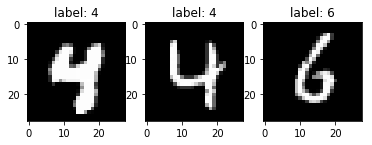

[4]
한 번에 로드되는 데이터 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


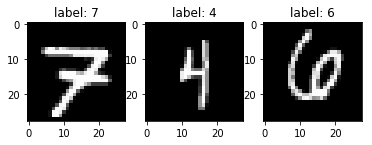

[5]
한 번에 로드되는 데이터 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


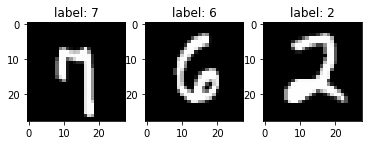

In [23]:
n=3 ## 샘플로 그려볼 데이터의 개수
for i, [imgs,labels] in enumerate(test_loader): ##batch_size 만큼, imgs lables인 이유는 for문 돌때마자 가지고 온다.
    if i>5:
        break
    
    print "[%d]" %i
    print "한 번에 로드되는 데이터 크기", len(imgs) #batch size가 16이라서 16임
    
    #GPU에 로드되기 위함, 만약 CPU로 설정되어 있으면 자동으로 CPU로 로드됨<신경X
    
    x=Variable(imgs)#.cuda()   #(batch_size, 1, 28, 28) ##Variable은 GPU 가속 받는 옵션에서 씌워줘야한다.
   # 1이 필요가 없어서 없애줌
    x=x.reshape((x.shape[0],x.shape[2],x.shape[3])) #(batch_size, 1, 28,28)->(batch_size,28,28)
    y_=Variable(labels)#.cuda() #(batch_size)
    
    print x.shape
    print y_.shape
    
    #그리기
    for j in range(n): #임의로 3으로 설정했으므로 3개 그림이 나온다.
        img=imgs[j].numpy() #image 타입을 numpy로 변환 Variable은 tensor이므로 numpy로 바꿔줘야함. 원래 학습 시킬땐 그리면서 하지 않는다., (1,28,28)
        img=img.reshape((img.shape[1],img.shape[2]))  #(1,28,28)->(28,28)
        #print img.shape
        
        plt.subplot(1, n, j+1) #(1,3)형태 플릿의 j번째 자리에 그리겠다
        plt.imshow(img,cmap='gray')
        plt.title("label: %d" %labels[j])
    plt.show()
        